# **SA on TINTIN Corpus: Data Preprocessing**

## **Data Preprocessing**

In [1]:
import pandas as pd # importing pandas library

In [2]:
df0 = pd.read_csv('/Users/zhouxiaoyu/desktop/tintin/origin.csv')

In [3]:
df2 = pd.read_csv('/Users/zhouxiaoyu/desktop/tintin/mast.csv')

In [6]:
df1 = pd.read_csv('/Users/zhouxiaoyu/desktop/tintin/framing.csv', dtype={'Column12': str})

/var/folders/qr/80cgq6_d629dw28l_btkrpq80000gn/T/ipykernel_6796/3572649472.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/zhouxiaoyu/desktop/tintin/framing.csv', dtype={'Column12': str})


In [9]:
df1.drop(columns=['Annotation Notes'], inplace=True)

In [11]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75823 entries, 0 to 75822
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Project ID            75823 non-null  int64  
 1   Project Name          75823 non-null  object 
 2   Document Name         75823 non-null  object 
 3   Document Directory    75823 non-null  object 
 4   Document Description  75823 non-null  object 
 5   Page Number           75823 non-null  int64  
 6   Region ID             75823 non-null  int64  
 7   Region Type           75823 non-null  object 
 8   Region Vertices       75823 non-null  object 
 9   Region Area           75823 non-null  float64
 10  Annotation ID         75823 non-null  int64  
 11  Taxonomy Path         75823 non-null  object 
 12  Page Area             75823 non-null  int64  
 13  Relative Area(%)      75823 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 8.1+ MB
None


In [12]:
# 1. Check for duplicates in the 'Region ID' column
region_id_duplicates = df0['Region ID'].duplicated().sum()
print(f"Number of duplicate 'Region ID' entries: {region_id_duplicates}")

# 2. Check for missing values in 'Valence#' and 'Arousal'
valence_missing = df0['Valence#'].isnull().sum()
arousal_missing = df0['Arousal'].isnull().sum()

print(f"Number of missing 'Valence#' values: {valence_missing}")
print(f"Number of missing 'Arousal' values: {arousal_missing}")

# 3. Check for 'Valence#' values that are neither integers nor one decimal place
valence_invalid = df0['Valence#'].apply(lambda x: not (x.is_integer() or round(x, 1) == x)).sum()
print(f"Number of 'Valence#' values that are neither integers nor one decimal place: {valence_invalid}")

# 4. Check for 'Valence#' values greater than 1 or less than -1
valence_out_of_bounds = df0[(df0['Valence#'] > 1) | (df0['Valence#'] < -1)]
print(f"Number of 'Valence#' values outside the range [-1, 1]: {valence_out_of_bounds.shape[0]}")

# 5. Check for 'Arousal' values greater than 5 or less than 1
arousal_out_of_bounds = df0[(df0['Arousal'] > 5) | (df0['Arousal'] < 1)]
print(f"Number of 'Arousal' values outside the range [1, 5]: {arousal_out_of_bounds.shape[0]}")

Number of duplicate 'Region ID' entries: 3
Number of missing 'Valence#' values: 0
Number of missing 'Arousal' values: 22
Number of 'Valence#' values that are neither integers nor one decimal place: 0
Number of 'Valence#' values outside the range [-1, 1]: 0
Number of 'Arousal' values outside the range [1, 5]: 0


In [13]:
# 1. Remove rows with duplicate 'Region ID', keeping only the first occurrence
df_cleaned = df0.drop_duplicates(subset='Region ID', keep='first')

# 2. Remove rows with missing 'Arousal' values
df_cleaned = df_cleaned.dropna(subset=['Arousal'])

# Display the information of the cleaned DataFrame
print(df_cleaned.info())

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('/Users/zhouxiaoyu/desktop/tintin/cleaned_origin.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59736 entries, 0 to 59760
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project ID             59736 non-null  int64  
 1   Project Name           59736 non-null  object 
 2   Document Name          59736 non-null  object 
 3   Global Region          59736 non-null  object 
 4   RegionSimplified       59736 non-null  object 
 5   Country                59736 non-null  object 
 6   Document Name.1        59736 non-null  object 
 7   Publication Date       59736 non-null  int64  
 8   Publisher              53252 non-null  object 
 9   Format                 59736 non-null  object 
 10  CountryLang            59736 non-null  object 
 11  LanguageFinal          59736 non-null  object 
 12  Silent?                9118 non-null   object 
 13  Genre Simplified       58155 non-null  object 
 14  StyleDetail            59736 non-null  object 
 15  St

In [14]:
# 1. Remove rows with duplicate 'Region ID', keeping only the first occurrence
df_cleaned = df0.drop_duplicates(subset='Region ID', keep='first')

# 2. Remove rows with missing 'Arousal' values
df_cleaned = df_cleaned.dropna(subset=['Arousal'])

# Display the information of the cleaned DataFrame
print(df_cleaned.info())

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('/Users/zhouxiaoyu/desktop/tintin/cleaned_origin.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59736 entries, 0 to 59760
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project ID             59736 non-null  int64  
 1   Project Name           59736 non-null  object 
 2   Document Name          59736 non-null  object 
 3   Global Region          59736 non-null  object 
 4   RegionSimplified       59736 non-null  object 
 5   Country                59736 non-null  object 
 6   Document Name.1        59736 non-null  object 
 7   Publication Date       59736 non-null  int64  
 8   Publisher              53252 non-null  object 
 9   Format                 59736 non-null  object 
 10  CountryLang            59736 non-null  object 
 11  LanguageFinal          59736 non-null  object 
 12  Silent?                9118 non-null   object 
 13  Genre Simplified       58155 non-null  object 
 14  StyleDetail            59736 non-null  object 
 15  St

In [15]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75823 entries, 0 to 75822
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Project ID            75823 non-null  int64  
 1   Project Name          75823 non-null  object 
 2   Document Name         75823 non-null  object 
 3   Document Directory    75823 non-null  object 
 4   Document Description  75823 non-null  object 
 5   Page Number           75823 non-null  int64  
 6   Region ID             75823 non-null  int64  
 7   Region Type           75823 non-null  object 
 8   Region Vertices       75823 non-null  object 
 9   Region Area           75823 non-null  float64
 10  Annotation ID         75823 non-null  int64  
 11  Taxonomy Path         75823 non-null  object 
 12  Page Area             75823 non-null  int64  
 13  Relative Area(%)      75823 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 8.1+ MB
None


In [16]:
# 1. Check for duplicates in the 'Region ID' column
region_id_duplicates = df1['Region ID'].duplicated().sum()
print(f"Number of duplicate 'Region ID' entries in df1: {region_id_duplicates}")

# 2. Simplify 'Taxonomy Path' column name and content
# Rename 'Taxonomy Path' to 'Framing'
df1.rename(columns={'Taxonomy Path': 'Framing'}, inplace=True)

# Simplify 'Framing' column to retain only the information after the last '/'
df1['Framing'] = df1['Framing'].apply(lambda x: x.split('/')[-1].strip())

# Display the cleaned DataFrame information
print(df1.info())

Number of duplicate 'Region ID' entries in df1: 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75823 entries, 0 to 75822
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Project ID            75823 non-null  int64  
 1   Project Name          75823 non-null  object 
 2   Document Name         75823 non-null  object 
 3   Document Directory    75823 non-null  object 
 4   Document Description  75823 non-null  object 
 5   Page Number           75823 non-null  int64  
 6   Region ID             75823 non-null  int64  
 7   Region Type           75823 non-null  object 
 8   Region Vertices       75823 non-null  object 
 9   Region Area           75823 non-null  float64
 10  Annotation ID         75823 non-null  int64  
 11  Framing               75823 non-null  object 
 12  Page Area             75823 non-null  int64  
 13  Relative Area(%)      75823 non-null  float64
dtypes: float64(2), int6

In [17]:
df1 = pd.read_csv('/Users/zhouxiaoyu/desktop/tintin/framing.csv', usecols=lambda x: x != 'Unnamed: 11', low_memory=False)

# 1. Check for duplicates in the 'Region ID' column
region_id_duplicates = df1['Region ID'].duplicated().sum()
print(f"Number of duplicate 'Region ID' entries in df1: {region_id_duplicates}")

# 2. Simplify 'Taxonomy Path' column name and content
# Rename 'Taxonomy Path' to 'Framing'
df1.rename(columns={'Taxonomy Path': 'Framing'}, inplace=True)

# Simplify 'Framing' column to retain only the information after the last '/'
df1['Framing'] = df1['Framing'].apply(lambda x: x.split('/')[-1].strip())

# Remove the 12th column (0-indexed as 11th) 'Annotation Notes'
df1.drop(columns=['Annotation Notes'], inplace=True)

# Display the cleaned DataFrame information
print(df1.info())

Number of duplicate 'Region ID' entries in df1: 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75823 entries, 0 to 75822
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Project ID            75823 non-null  int64  
 1   Project Name          75823 non-null  object 
 2   Document Name         75823 non-null  object 
 3   Document Directory    75823 non-null  object 
 4   Document Description  75823 non-null  object 
 5   Page Number           75823 non-null  int64  
 6   Region ID             75823 non-null  int64  
 7   Region Type           75823 non-null  object 
 8   Region Vertices       75823 non-null  object 
 9   Region Area           75823 non-null  float64
 10  Annotation ID         75823 non-null  int64  
 11  Framing               75823 non-null  object 
 12  Page Area             75823 non-null  int64  
 13  Relative Area(%)      75823 non-null  float64
dtypes: float64(2), int6

In [19]:
# save the modified DataFrame to a new CSV file
df1.to_csv('/Users/zhouxiaoyu/desktop/tintin/cleaned_framing.csv')

In [20]:
df_cleaned_origin = pd.read_csv('/Users/zhouxiaoyu/desktop/tintin/cleaned_origin.csv')
df_cleaned_framing = pd.read_csv('/Users/zhouxiaoyu/desktop/tintin/cleaned_framing.csv')

In [21]:
df_process = df_cleaned_origin.merge(
    df_cleaned_framing[['Region ID', 'Framing']],
    on='Region ID',
    how='left'
)

print(df_process.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59754 entries, 0 to 59753
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project ID             59754 non-null  int64  
 1   Project Name           59754 non-null  object 
 2   Document Name          59754 non-null  object 
 3   Global Region          59754 non-null  object 
 4   RegionSimplified       59754 non-null  object 
 5   Country                59754 non-null  object 
 6   Document Name.1        59754 non-null  object 
 7   Publication Date       59754 non-null  int64  
 8   Publisher              53266 non-null  object 
 9   Format                 59754 non-null  object 
 10  CountryLang            59754 non-null  object 
 11  LanguageFinal          59754 non-null  object 
 12  Silent?                9120 non-null   object 
 13  Genre Simplified       58172 non-null  object 
 14  StyleDetail            59754 non-null  object 
 15  St

In [22]:
# Filter rows where the 'Uploaded to MAST' column is not null, and creates a new DataFrame. 
# Since the MAST file includes both processed and unprocessed files, having information in the 'Uploaded to MAST' column indicates that these are files that have already been uploaded to MAST.
df_mast = df2[df2['Uploaded to MAST'].notnull()]

In [23]:
df_mast.info

<bound method DataFrame.info of      Unnamed: 0                Document directory          Format  \
0            NC  441b7c23852b1a05d8460b14a56a4ae4        Webcomic   
1            NC                               NaN   Graphic Novel   
2            NC                               NaN        Webcomic   
3            SG                               NaN   Graphic Novel   
4            NC                               NaN     Short story   
...         ...                               ...             ...   
1025      NC/SL                               NaN  Comic magazine   
1026      NC/SL                               NaN      Comic book   
1027      NC/SL                               NaN      Comic book   
1028      NC/SL                               NaN  Comic magazine   
1029      NC/SL                               NaN  Comic magazine   

                      Comic_title Untranslated Title Source Title  \
0               Princesha Argjiro                NaN          NaN   
1

In [24]:
# Merge df_process with df_mast to add the '2.5.1 Panel Emotions' column
df_process = pd.merge(
    df_process, 
    df_mast[['Comic_title', '2.5.1 Panel Emotions']],  
    left_on='Document Name',
    right_on='Comic_title', 
    how='left'               
)

# Optionally, drop the 'Comic_title' column if it's no longer needed
df_process.drop(columns=['Comic_title'], inplace=True)

In [25]:
print(df_process.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60301 entries, 0 to 60300
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project ID             60301 non-null  int64  
 1   Project Name           60301 non-null  object 
 2   Document Name          60301 non-null  object 
 3   Global Region          60301 non-null  object 
 4   RegionSimplified       60301 non-null  object 
 5   Country                60301 non-null  object 
 6   Document Name.1        60301 non-null  object 
 7   Publication Date       60301 non-null  int64  
 8   Publisher              53800 non-null  object 
 9   Format                 60301 non-null  object 
 10  CountryLang            60301 non-null  object 
 11  LanguageFinal          60301 non-null  object 
 12  Silent?                9622 non-null   object 
 13  Genre Simplified       58719 non-null  object 
 14  StyleDetail            60301 non-null  object 
 15  St

In [26]:
# Remove punctuation, spaces, and numbers from the '2.5.1 Panel Emotions' column and convert all values to uppercase
df_process['2.5.1 Panel Emotions'] = df_process['2.5.1 Panel Emotions'].str.replace(r'[^\w\s]|[\d]','', regex=True).str.replace(' ','').str.upper()

# Calculate the frequency of each value in the '2.5.1 Panel Emotions' column
emotions_counts = df_process['2.5.1 Panel Emotions'].value_counts()

# Print the frequency counts
print('Panel Number')
print(emotions_counts)

Panel Number
XZ    12374
JB    10596
SD     9377
JW     8063
LZ     6603
NC       11
Name: 2.5.1 Panel Emotions, dtype: int64


In [27]:
# Count the number of unique 'Document Name'
emotions_doc_count = df_process.groupby('2.5.1 Panel Emotions')['Document Name'].nunique()

# Convert Series to string and remove column name
emotions_doc_count_str = str(emotions_doc_count)
emotions_doc_count_str = emotions_doc_count_str.replace('2.5.1 Panel Emotions\n', '')

# Display the count results
print('Comics Number')
print(emotions_doc_count_str)

Comics Number
JB    158
JW    150
LZ    118
NC      1
SD    116
XZ    157
Name: Document Name, dtype: int64


In [28]:
output_csv_path = '/Users/zhouxiaoyu/desktop/tintin/tintin.csv'
df_tintin = df_process.to_csv(output_csv_path, index=False)

## **Corpus Design**

In [29]:
df_tintin = pd.read_csv('/Users/zhouxiaoyu/desktop/tintin/tintin.csv')

In [30]:
# Remove leading and trailing whitespace from the 'Format' column
df_tintin['Format'] = df_tintin['Format'].str.strip()

In [31]:
# Define the categorical column to calculate
categorical_column = 'Format'

# Calculate the number of unique 'Document Name' in each category of 'Format'
unique_counts = df_tintin.groupby(categorical_column)['Document Name'].nunique()
print(f"\nUnique Document Name Counts for {categorical_column}:")
print(unique_counts)

# Check for missing values in the 'Format' column
missing_values = df_tintin[categorical_column].isnull().sum()
print(f"Missing values in {categorical_column}: {missing_values}")


Unique Document Name Counts for Format:
Format
Anthology        180
Comic book       264
Graphic Novel    129
Short story      188
Webcomic         144
Name: Document Name, dtype: int64
Missing values in Format: 0


In [32]:
# Filter the data
# Only include formats such as "Comic book", "Short story", and "Anthology"
formats_to_include = ["Comic book", "Short story", "Anthology"]
df_tintin_completed = df_tintin[df_tintin['Format'].isin(formats_to_include)]
unique_document_names = df_tintin_completed['Document Name'].nunique()
print(f'Unique Document Names: {unique_document_names}')

Unique Document Names: 631


In [33]:
# Copy df_tintin
df_tintin_copy = df_tintin.copy()

# Save the processed DataFrame to a new CSV file
df_tintin_completed.to_csv('/Users/zhouxiaoyu/desktop/tintin/tintin_completed.csv', index=False)

In [34]:
# Define the categorical column to calculate
categorical_column = 'RegionSimplified'

# Calculate the number of unique 'Document Name' in each category of 'RegionSimplified'
unique_counts = df_tintin_completed.groupby(categorical_column)['Document Name'].nunique()
print(f"\nUnique Document Name Counts for {categorical_column}:")
print(unique_counts)

# Check for missing values in the 'RegionSimplified' column
missing_values = df_tintin_completed[categorical_column].isnull().sum()
print(f"Missing values in {categorical_column}: {missing_values}")


Unique Document Name Counts for RegionSimplified:
RegionSimplified
Africa               144
East Asia             68
Europe               170
North America         36
Oceania               17
South America         91
SouthCentral Asia     52
West Asia             55
Name: Document Name, dtype: int64
Missing values in RegionSimplified: 0


In [35]:
# Create a copy of the 'RegionSimplified' column
df_region = df_tintin_completed.copy()

# Remove rows with 'Oceania' and 'North America' categories
df_region = df_region[~df_region['RegionSimplified'].isin(['Oceania', 'North America'])]

# Count the number of unique 'Document Name' for each 'RegionSimplified' category after processing
comics_number_region = df_region.groupby('RegionSimplified')['Document Name'].nunique()
print("\nComics Number for RegionSimplified after processing:")
print(comics_number_region)


Comics Number for RegionSimplified after processing:
RegionSimplified
Africa               144
East Asia             68
Europe               170
South America         91
SouthCentral Asia     52
West Asia             55
Name: Document Name, dtype: int64


In [36]:
print(df_region.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37313 entries, 0 to 60300
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project ID             37313 non-null  int64  
 1   Project Name           37313 non-null  object 
 2   Document Name          37313 non-null  object 
 3   Global Region          37313 non-null  object 
 4   RegionSimplified       37313 non-null  object 
 5   Country                37313 non-null  object 
 6   Document Name.1        37313 non-null  object 
 7   Publication Date       37313 non-null  int64  
 8   Publisher              33354 non-null  object 
 9   Format                 37313 non-null  object 
 10  CountryLang            37313 non-null  object 
 11  LanguageFinal          37313 non-null  object 
 12  Silent?                8640 non-null   object 
 13  Genre Simplified       36238 non-null  object 
 14  StyleDetail            37313 non-null  object 
 15  St

In [37]:
# Rename the '2.5.1 Panel Emotions' column to 'Annotator' in df_region
df_region.rename(columns={'2.5.1 Panel Emotions': 'Annotator'}, inplace=True)

# Display the modified DataFrame to confirm the change
print(df_region.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37313 entries, 0 to 60300
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project ID             37313 non-null  int64  
 1   Project Name           37313 non-null  object 
 2   Document Name          37313 non-null  object 
 3   Global Region          37313 non-null  object 
 4   RegionSimplified       37313 non-null  object 
 5   Country                37313 non-null  object 
 6   Document Name.1        37313 non-null  object 
 7   Publication Date       37313 non-null  int64  
 8   Publisher              33354 non-null  object 
 9   Format                 37313 non-null  object 
 10  CountryLang            37313 non-null  object 
 11  LanguageFinal          37313 non-null  object 
 12  Silent?                8640 non-null   object 
 13  Genre Simplified       36238 non-null  object 
 14  StyleDetail            37313 non-null  object 
 15  St

In [38]:
pip install statsmodels # Install the statsmodels library

Note: you may need to restart the kernel to use updated packages.


In [39]:
# Import libraries for data visualization and statistical modeling.
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 

In [40]:
# Create a copy of the df_region DataFrame
df_region_copy = df_region.copy()

# Reduce 'Document Name' counts by 5 for 'Manga' and 5 for 'RealExaggerated'
style_reductions = {'Manga': 5, 'RealExaggerated': 6}

for style, reduction_count in style_reductions.items():
    # Get unique 'Document Name' for the specific style
    unique_documents = df_region_copy[df_region_copy['StyleBroad'] == style]['Document Name'].unique()
    # Randomly select reduction_count number of unique 'Document Name'
    documents_to_drop = pd.Series(unique_documents).sample(reduction_count).tolist()
    # Drop rows corresponding to these 'Document Name'
    df_region_copy = df_region_copy[~df_region_copy['Document Name'].isin(documents_to_drop)]


columns_to_check = ['StyleBroad']

# Print the unique Document Name distribution for each style within each region
for region in df_region_copy['RegionSimplified'].unique():
    print(f"Unique Document Name Distribution for Region: {region}")
    sub_df = df_region_copy[df_region_copy['RegionSimplified'] == region]

    for column in columns_to_check:
        unique_document_counts = sub_df.groupby(column)['Document Name'].nunique()
        total_unique_documents = unique_document_counts.sum()
        subcategory_percentages = (unique_document_counts / total_unique_documents * 100).round(2)
        subcategory_combined = unique_document_counts.astype(str) + " (" + subcategory_percentages.astype(str) + "%)"
        print(f"{column} Distribution and Percentages:")
        print(subcategory_combined)

    print("\n" + "=" * 50 + "\n\n")

Unique Document Name Distribution for Region: Africa
StyleBroad Distribution and Percentages:
StyleBroad
Cartoony            36 (25.9%)
Manga              26 (18.71%)
RealExaggerated    71 (51.08%)
Realistic            6 (4.32%)
Name: Document Name, dtype: object



Unique Document Name Distribution for Region: SouthCentral Asia
StyleBroad Distribution and Percentages:
StyleBroad
Cartoony           16 (31.37%)
Manga              12 (23.53%)
RealExaggerated    19 (37.25%)
Realistic            4 (7.84%)
Name: Document Name, dtype: object



Unique Document Name Distribution for Region: East Asia
StyleBroad Distribution and Percentages:
StyleBroad
Cartoony             6 (8.82%)
Manga              37 (54.41%)
RealExaggerated    13 (19.12%)
Realistic          12 (17.65%)
Name: Document Name, dtype: object



Unique Document Name Distribution for Region: Europe
StyleBroad Distribution and Percentages:
StyleBroad
Alternative        24 (14.29%)
Cartoony           25 (14.88%)
Manga             

In [41]:
# Define the sample size for each region
region_sample_sizes = {
    'Africa': 65,
    'East Asia': 65,
    'Europe': 65,
    'South America': 65,
    'SouthCentral Asia': 50,
    'West Asia': 50
}

# Initialize an empty DataFrame to store the sampled results
df_region_sample = pd.DataFrame()

# Perform random sampling for each region
for region, sample_size in region_sample_sizes.items():
    # Get the sub DataFrame for the current region
    sub_df = df_region_copy[df_region_copy['RegionSimplified'] == region]
    
    # Get unique Document Names after removing duplicates
    unique_documents = sub_df.drop_duplicates(subset=['Document Name'])
    
    # Adjust the sample size if the actual number of unique Document Names is less than required
    if len(unique_documents) < sample_size:
        print(f"Warning: The number of unique Document Names in region {region} is less than the required sample size of {sample_size}. Actual number: {len(unique_documents)}")
        sample_size = len(unique_documents)
    
    # Randomly sample unique Document Names
    sampled_documents = unique_documents.sample(n=sample_size, random_state=1, replace=False)
    
    # Append the sampled results to the result DataFrame
    df_region_sample = pd.concat([df_region_sample, sub_df[sub_df['Document Name'].isin(sampled_documents['Document Name'])]])

In [42]:
import pandas as pd

# Define the columns to check
columns_to_check = ['Genre Simplified', 'StyleBroad']

# Print the unique Document Name distribution for each region
for region in df_region_sample['RegionSimplified'].unique():
    print(f"Unique Document Name Distribution for Region: {region}")
    print("=" * 50)
    sub_df = df_region_sample[df_region_sample['RegionSimplified']== region]

    for column in columns_to_check:
        # Calculate the number of unique Document Names for each subcategory
        unique_document_counts = sub_df.groupby(column)['Document Name'].nunique()
        total_unique_documents = unique_document_counts.sum()

        # Calculate the percentage for each subcategory
        subcategory_percentages = (unique_document_counts / total_unique_documents * 100).round(2)

        # Combine unique counts and percentages
        subcategory_combined = unique_document_counts.astype(str) + " (" + subcategory_percentages.astype(str) + "%)"
        print(f"{column} Distribution and Percentages:")
        print(subcategory_combined)
        print("\n")

    print("\n" + "=" * 50 + "\n\n")

Unique Document Name Distribution for Region: Africa
Genre Simplified Distribution and Percentages:
Genre Simplified
Action Adventure          4 (7.02%)
Drama                   13 (22.81%)
Fantasy                  6 (10.53%)
Historical adventure      1 (1.75%)
Horror                    3 (5.26%)
Humor                     1 (1.75%)
Political               16 (28.07%)
Science fiction           4 (7.02%)
Superhero                8 (14.04%)
Supernatural              1 (1.75%)
Name: Document Name, dtype: object


StyleBroad Distribution and Percentages:
StyleBroad
Cartoony           14 (21.54%)
Manga              12 (18.46%)
RealExaggerated    36 (55.38%)
Realistic            3 (4.62%)
Name: Document Name, dtype: object





Unique Document Name Distribution for Region: East Asia
Genre Simplified Distribution and Percentages:
Genre Simplified
Action Adventure          6 (10.0%)
Autobiography             1 (1.67%)
Childrens                 1 (1.67%)
Drama                   14 (23.33%)
Fantas

In [43]:
print(df_region_sample.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23976 entries, 200 to 60300
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project ID             23976 non-null  int64  
 1   Project Name           23976 non-null  object 
 2   Document Name          23976 non-null  object 
 3   Global Region          23976 non-null  object 
 4   RegionSimplified       23976 non-null  object 
 5   Country                23976 non-null  object 
 6   Document Name.1        23976 non-null  object 
 7   Publication Date       23976 non-null  int64  
 8   Publisher              22072 non-null  object 
 9   Format                 23976 non-null  object 
 10  CountryLang            23976 non-null  object 
 11  LanguageFinal          23976 non-null  object 
 12  Silent?                6043 non-null   object 
 13  Genre Simplified       23188 non-null  object 
 14  StyleDetail            23976 non-null  object 
 15  

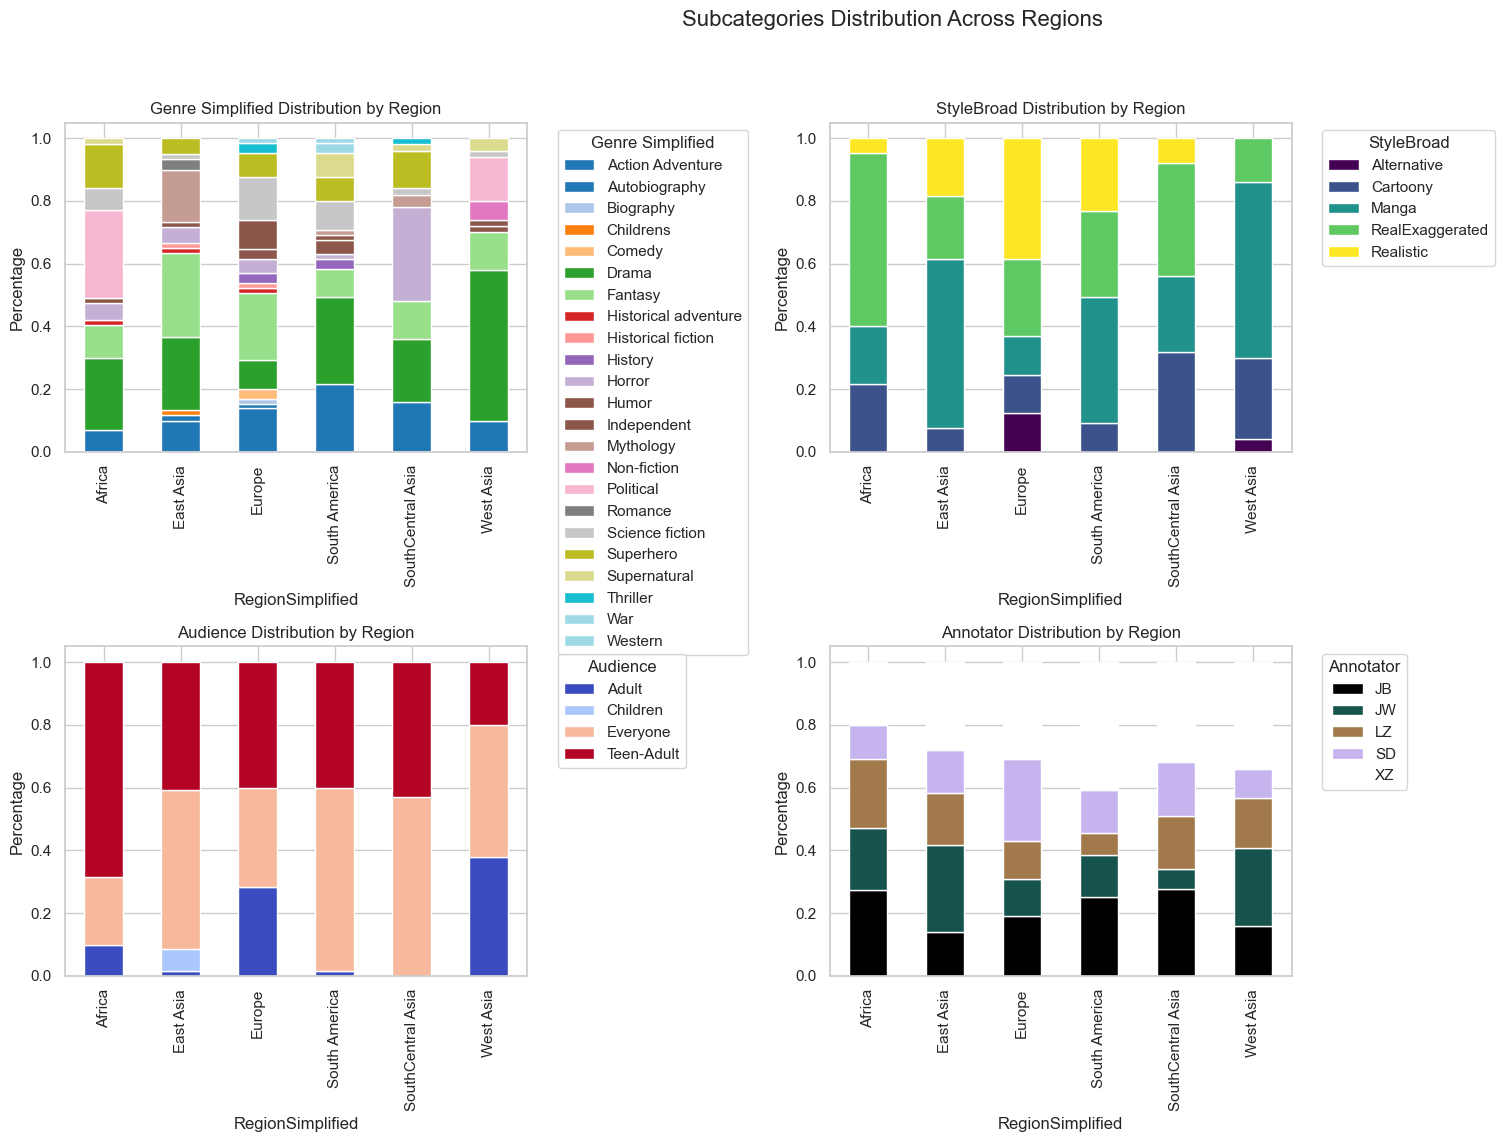

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Calculate the number of unique comics for each category within each RegionSimplified
region_genre_comics_count = df_region_sample.groupby(['RegionSimplified', 'Genre Simplified'])['Document Name'].nunique().unstack().fillna(0)
region_style_comics_count = df_region_sample.groupby(['RegionSimplified', 'StyleBroad'])['Document Name'].nunique().unstack().fillna(0)
region_audience_comics_count = df_region_sample.groupby(['RegionSimplified', 'Audience'])['Document Name'].nunique().unstack().fillna(0)
region_annotator_comics_count = df_region_sample.groupby(['RegionSimplified', 'Annotator'])['Document Name'].nunique().unstack().fillna(0)

# Prepare the figure
regions = df_region_sample['RegionSimplified'].unique()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle('Subcategories Distribution Across Regions', fontsize=16, y=0.95)

# Distribution of Genre Simplified
genre_percentages = region_genre_comics_count.div(region_genre_comics_count.sum(axis=1), axis=0)
genre_percentages.plot(kind='bar', stacked=True, ax=axes[0, 0], colormap='tab20')
axes[0, 0].set_title("Genre Simplified Distribution by Region")
axes[0, 0].set_xlabel("RegionSimplified")
axes[0, 0].set_ylabel("Percentage")
axes[0, 0].legend(title="Genre Simplified", bbox_to_anchor=(1.05, 1), loc='upper left')

# # Distribution of StyleBroad
style_percentages = region_style_comics_count.div(region_style_comics_count.sum(axis=1), axis=0)
style_percentages.plot(kind='bar', stacked=True, ax=axes[0, 1], colormap='viridis')
axes[0, 1].set_title("StyleBroad Distribution by Region")
axes[0, 1].set_xlabel("RegionSimplified")
axes[0, 1].set_ylabel("Percentage")
axes[0, 1].legend(title="StyleBroad", bbox_to_anchor=(1.05, 1), loc='upper left')

# Audience 
audience_percentages = region_audience_comics_count.div(region_audience_comics_count.sum(axis=1), axis=0)
audience_percentages.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='coolwarm')
axes[1, 0].set_title("Audience Distribution by Region")
axes[1, 0].set_xlabel("RegionSimplified")
axes[1, 0].set_ylabel("Percentage")
axes[1, 0].legend(title="Audience", bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotator
annotator_percentages = region_annotator_comics_count.div(region_annotator_comics_count.sum(axis=1), axis=0)
annotator_percentages.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='cubehelix')
axes[1, 1].set_title("Annotator Distribution by Region")
axes[1, 1].set_xlabel("RegionSimplified")
axes[1, 1].set_ylabel("Percentage")
axes[1, 1].legend(title="Annotator", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout(rect=[0, 0, 0.85, 0.92])  # 调整矩形以适应顶部的标题

plt.show()

In [45]:
import pandas as pd

# Calculate the number of unique comics for each category within each RegionSimplified
region_genre_comics_count = df_region_sample.groupby(['RegionSimplified', 'Genre Simplified'])['Document Name'].nunique().unstack().fillna(0)
region_style_comics_count = df_region_sample.groupby(['RegionSimplified', 'StyleBroad'])['Document Name'].nunique().unstack().fillna(0)
region_audience_comics_count = df_region_sample.groupby(['RegionSimplified', 'Audience'])['Document Name'].nunique().unstack().fillna(0)
region_annotator_comics_count = df_region_sample.groupby(['RegionSimplified', 'Annotator'])['Document Name'].nunique().unstack().fillna(0)

# Calculate the percentage of each category within each region
genre_percentages = region_genre_comics_count.div(region_genre_comics_count.sum(axis=1), axis=0) * 100
style_percentages = region_style_comics_count.div(region_style_comics_count.sum(axis=1), axis=0) * 100
audience_percentages = region_audience_comics_count.div(region_audience_comics_count.sum(axis=1), axis=0) * 100
annotator_percentages = region_annotator_comics_count.div(region_annotator_comics_count.sum(axis=1), axis=0) * 100

# Filter and print data with percentages over 50%
def print_over_50(data, category_name):
    print(f"\n{category_name} - Categories with more than 50%:")
    over_50 = data[data > 50].dropna(how='all')
    for region in over_50.index:
        for category in over_50.columns:
            if pd.notna(over_50.loc[region, category]):
                print(f"Region: {region}, {category_name}: {category}, Percentage: {over_50.loc[region, category]:.2f}%")

# Output data with percentages over 50% for each category
print_over_50(genre_percentages, 'Genre Simplified')
print_over_50(style_percentages, 'StyleBroad')
print_over_50(audience_percentages, 'Audience')
print_over_50(annotator_percentages, 'Annotator')


Genre Simplified - Categories with more than 50%:

StyleBroad - Categories with more than 50%:
Region: Africa, StyleBroad: RealExaggerated, Percentage: 55.38%
Region: East Asia, StyleBroad: Manga, Percentage: 53.85%
Region: West Asia, StyleBroad: Manga, Percentage: 56.00%

Audience - Categories with more than 50%:
Region: Africa, Audience: Teen-Adult, Percentage: 68.33%
Region: East Asia, Audience: Everyone, Percentage: 50.85%
Region: South America, Audience: Everyone, Percentage: 58.46%
Region: SouthCentral Asia, Audience: Everyone, Percentage: 57.14%

Annotator - Categories with more than 50%:


In [46]:
import pandas as pd

unique_docs_per_region = df_region_sample.groupby('RegionSimplified')['Document Name'].nunique()

print("Unique Document Name count by RegionSimplified:")
print(unique_docs_per_region)


Unique Document Name count by RegionSimplified:
RegionSimplified
Africa               65
East Asia            65
Europe               65
South America        65
SouthCentral Asia    50
West Asia            50
Name: Document Name, dtype: int64


In [47]:
import pandas as pd

# Calculate the number of unique Document Names in each RegionSimplified (Total comics)
total_comics = df_region_sample.groupby('RegionSimplified')['Document Name'].nunique()

# Calculate the maximum Page Number for each Document Name in each RegionSimplified (Total pages)
total_pages = df_region_sample.groupby(['RegionSimplified', 'Document Name'])['Page Number'].max().groupby('RegionSimplified').sum()

# Calculate the count of Page Numbers in each RegionSimplified (Total panels)
total_panels = df_region_sample.groupby('RegionSimplified')['Page Number'].count()

# Combine the results into a single DataFrame
result = pd.DataFrame({
    'Total_comics': total_comics,
    'Total_pages': total_pages,
    'Total_panels': total_panels
}).reset_index()

# Calculate the number of Panels per Page
result['Panels_per_page'] = (result['Total_panels'] / result['Total_pages']).round(3)

# Round the result DataFrame to three decimal places
result = result.round(3)

# Display the result
print(result)

    RegionSimplified  Total_comics  Total_pages  Total_panels  Panels_per_page
0             Africa            65          693          3110            4.488
1          East Asia            65         1173          5076            4.327
2             Europe            65          834          4335            5.198
3      South America            65          893          4487            5.025
4  SouthCentral Asia            50          792          3576            4.515
5          West Asia            50          593          3392            5.720


In [48]:
# Define the output CSV file path
output_csv_path = '/Users/zhouxiaoyu/desktop/tintin/region_sample.csv'

# Save the DataFrame to a new CSV file
df_region_sample.to_csv(output_csv_path, index=False)

print(f"CSV file has been saved to: {output_csv_path}")

CSV file has been saved to: /Users/zhouxiaoyu/desktop/tintin/region_sample.csv
